# Seattle Airbnb Statistics Analysis

### Questions to answer:

Calendar Dataset
1. When is Seattle Airbnb peak season?
2. Which month is best to rent an Airbnb?
3. What day is best to rent an Airbnb?
4. How many days out of a year is Airbnb booked in Seattle as a host?
5. How much do Airbnb hosts make in Seattle?

Reviews Dataset
1. How many times of reviews does an Airbnb in Seattle receive

Listings Dataset
1. What distribution is the host cancelation policy?
2. What distribution is the host response time?
3. What property type of Airbnb is popular in Seattle?
4. Where is the popular area for Airbnb in Seattle?
5. Which district should you look for Airbnb in Capitol Hill?
6. What price is Airbnb in Capitol Hill?
7. What featues are important to predict Airbnb price?
8. How to predict Airbnb price?


# Importing Packages

In [1]:
#Importing the required packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline
import seaborn as sns
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
#Changing the directory
import os
path="C:/Users/Yan/OneDrive/Desktop/Project 1"
os.chdir(path)

In [3]:
#Read files
listings=pd.read_csv('Seattle/listings.csv')
calendar=pd.read_csv('Seattle/calendar.csv')
reviews=pd.read_csv('Seattle/reviews.csv')

# Calendar Dataset

## 1. Exploring the dataset

In [4]:
#Checking general information of the dataset
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1048575 non-null  int64 
 1   date        1048575 non-null  object
 2   available   1048575 non-null  object
 3   price       699862 non-null   object
dtypes: int64(1), object(3)
memory usage: 32.0+ MB


In [5]:
calendar.shape

(1048575, 4)

In [6]:
# Checking the nulls in the dataset
calendar.isna().sum()

listing_id         0
date               0
available          0
price         348713
dtype: int64

In [7]:
#Checking the types in the column of 'available'
calendar.groupby(['available'])['available'].count()

available
f    348713
t    699862
Name: available, dtype: int64

 *The numbers of nulls in the 'price' is same as the number of 'f' in the column of 'available', which means the airbnbs were not rent out on those dates.

## 2. Cleaning the dataset

In [8]:
#Changing the datatypes 
calendar['listing_id']=calendar['listing_id'].astype(object)
calendar['price'] = calendar['price'].replace( '[\$,)]','', regex=True ).astype(float)
calendar['date']= pd.to_datetime(calendar['date'])
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1048575 non-null  object        
 1   date        1048575 non-null  datetime64[ns]
 2   available   1048575 non-null  object        
 3   price       699862 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 32.0+ MB


In [9]:
#Checking the duplicates
calendar.duplicated().sum()

0

In [10]:
calendar1=calendar[calendar['available']=='t']
calendar1.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [11]:
calendar2=calendar[calendar['available']=='f']
calendar2.head()

,listing_id,date,available,price
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN


## 3. Performing the analysis 

### A. When is Seattle Airbnb peak season?

In [12]:
#Checking the timeframe
calendar[['date']].agg({'date':['min','max']})

,date
min,2016-01-04
max,2017-01-02


In [13]:
calendar1_m= calendar1.groupby(calendar1['date'].dt.strftime('%B'))['available']
calendar1_m1=calendar1_m.value_counts().to_frame().reset_index(level=1, drop=True)
calendar2_m=calendar2.groupby(calendar2['date'].dt.strftime('%B'))['available']
calendar2_m1=calendar2_m.value_counts().to_frame().reset_index(level=1, drop=True)

In [14]:
idx=['January', 'February', 'March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
calendar1_m1=calendar1_m1.reindex(index=idx)
calendar2_m1=calendar2_m1.reindex(index=idx)

In [15]:
print(calendar1_m1)

           available
date                
January        48509
February       55210
March          63362
April          57338
May            60015
June           57890
July           55283
August         57009
September      57667
October        61472
November       61039
December       65068


In [16]:
print(calendar2_m1)

           available
date                
January        37679
February       28107
March          25701
April          28852
May            29048
June           28300
July           33780
August         32054
September      28523
October        27584
November       25121
December       23964


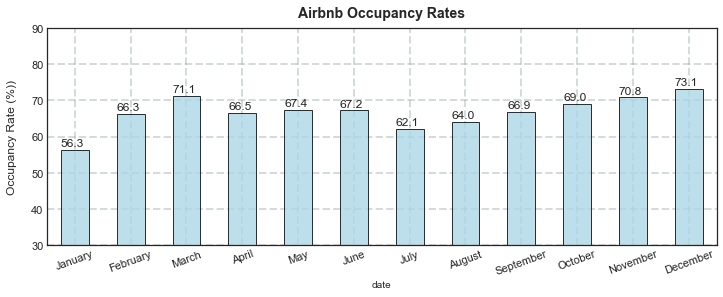

In [17]:
fig, ax = plt.subplots(figsize=(12,4))

y=round(calendar1_m1['available']/(calendar1_m1['available']+calendar2_m1['available'])*100,1)
y.plot(kind='bar',  align='center', ax=ax, width=0.5, color='lightblue',edgecolor='black', alpha=0.8, fontsize=11,rot=20)

for index, value in enumerate(y):
    ax.text( index-0.25,value+1, str(value), fontsize =12 )
 
ax.set_ylabel('Occupancy Rate (%))', fontsize=12, labelpad=14)
ax.set_title('Airbnb Occupancy Rates', y=1.02, fontsize=14, fontweight='bold')
ax.set_ylim(30, 90)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.4)

plt.show()

### B. Which month  is best to rent an Airbnb?

In [18]:
calendar_m= calendar1.groupby(calendar1['date'].dt.strftime('%B'))['price']

In [19]:
calendar_m2=calendar_m.mean().to_frame()
calendar_m2=calendar_m2.reindex(index=idx)

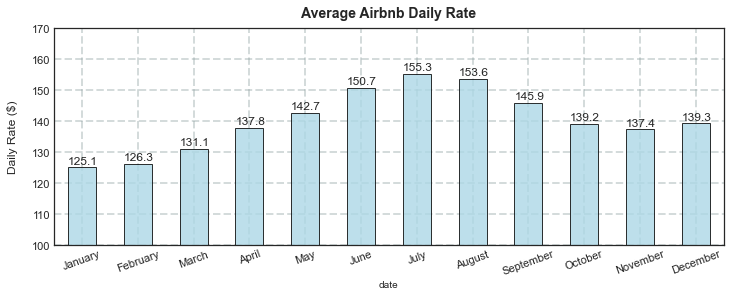

In [20]:
fig, ax = plt.subplots(figsize=(12,4))
width=0.5
ind=calendar_m2.index
y=round(calendar_m2['price'], 1)
y.plot(kind='bar',  align='center', ax=ax, width=0.5, color='lightblue',edgecolor='black', alpha=0.8, fontsize=11,rot=20)  
for index, value in enumerate(y):
    ax.text( index-0.25,value+1, str(value), fontsize =12 )
 
ax.set_ylabel('Daily Rate ($)', fontsize=12, labelpad=14)
ax.set_title('Average Airbnb Daily Rate', y=1.02, fontsize=14, fontweight='bold')
ax.set_ylim(100, 170)

plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.4)

plt.show()

### C. What day is best to rent an Airbnb?

In [21]:
#Comparing revenue of the different days in a week
calendar_d = calendar1.groupby(pd.Grouper(key='date', freq='2D')).mean() # groupby each 1 month
calendar_d.index = calendar_d.index.strftime('%A')
calendar_d1=calendar_d.groupby(by='date').mean()
calendar_d1

,price
date,
Friday,145.975477
Monday,137.639429
Saturday,142.865500
Sunday,138.111573
Thursday,142.778437
Tuesday,137.660660
Wednesday,138.079761


In [22]:
idx=['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
calendar_d1= calendar_d1.reindex(index = idx)

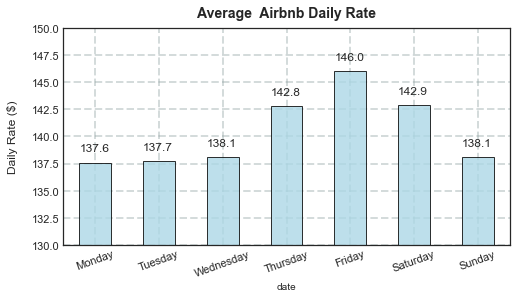

In [23]:
fig, ax = plt.subplots(figsize=(8,4))
width=0.5
ind=calendar_d1['price'].index
y=round(calendar_d1['price'], 1)
y.plot(kind='bar',  align='center', ax=ax, width=0.5, color='lightblue',edgecolor='black', alpha=0.8,fontsize=11, rot=20)  
for index, value in enumerate(y):
    ax.text( index-0.25,value+1, str(value), fontsize =12 )
 
ax.set_ylabel('Daily Rate ($)', fontsize=12, labelpad=14)
ax.set_title('Average  Airbnb Daily Rate', y=1.02, fontsize=14, fontweight='bold')
ax.set_ylim(130, 150)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.4)

plt.show()

### D. How many days out of a year is Airbnb booked in Seattle as a host?

In [24]:
#Checking the rental occupancy distribution
rental=calendar1.groupby(['listing_id']).size().reset_index(name='counts')

In [25]:
rental[['counts']].agg({'counts':['min','median','max']})

,counts
min,1.0
median,312.0
max,365.0


In [26]:
rental_grouped=pd.cut(rental['counts'], bins=[0,30,100,200,300,365]).value_counts().to_frame()
rental_grouped

,counts
"(300, 365]",1486
"(100, 200]",455
"(30, 100]",400
"(200, 300]",314
"(0, 30]",144


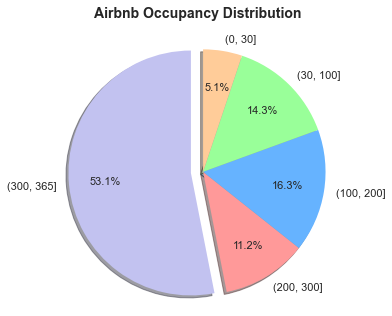

In [27]:
labels = '(300, 365]','(200, 300]', '(100, 200]', '(30, 100]','(0, 30]'
sizes = [1486, 314, 455, 400,144]
explode = (0.1, 0, 0, 0,0) 
colors = ['#c2c2f0','#ff9999','#66b3ff','#99ff99','#ffcc99']
fig, ax = plt.subplots(figsize=[5,5])
ax.pie(sizes, explode=explode, labels=labels, colors=colors,textprops={'fontsize': 11}, autopct='%1.1f%%',
        shadow=True, startangle=90,pctdistance=0.7)
ax.axis('equal')
plt.title('Airbnb Occupancy Distribution', y=1.05,fontsize=14, fontweight='bold')

plt.show()


### E. How much do Airbnb hosts make in Seattle?

In [28]:
#Checking yearly revenue of Seattle airbnb hosts
host=calendar1.groupby(by="listing_id").sum().sort_values(by="price")
host[['price']].agg({'price':['min','median','max']})

,price
min,64.0
median,27235.0
max,362941.0


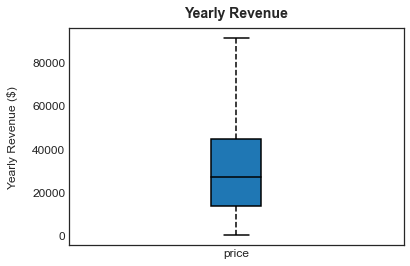

In [29]:
fig, ax=plt.subplots(figsize=(6,4))
host.plot(kind='box', ax=ax, fontsize=12,
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='--', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5, color='black'),
             whiskerprops=dict(linestyle='--', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             patch_artist=True,
             showfliers=False, grid=False)
ax.set_ylabel('Yearly Revenue ($)', fontsize=12, labelpad=14)
ax.set_title('Yearly Revenue', y=1.02, fontsize=14, fontweight='bold')
plt.show()

# Review Dataset

## 1. Exploring the dataset

In [30]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [31]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [32]:
#checkig the nulls 
reviews.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

## 2. Cleaning the dataset

In [33]:
#Checking the duplicates
reviews.duplicated().sum()

0

In [34]:
#Dropping the nulls and generate a new dataset('reviews1')
reviews1=reviews.dropna(subset=['comments'], axis=0)

In [35]:
##Changing the datatypes 
reviews1[['listing_id',  'id', 'reviewer_id']]=reviews1[['listing_id',  'id', 'reviewer_id']].astype(object)
reviews1['date']= pd.to_datetime(reviews['date'])
reviews1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84831 non-null  object        
 1   id             84831 non-null  object        
 2   date           84831 non-null  datetime64[ns]
 3   reviewer_id    84831 non-null  object        
 4   reviewer_name  84831 non-null  object        
 5   comments       84831 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 4.5+ MB


C:\anaconda\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-35-572085a0eb47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews1['date']= pd.to_datetime(reviews['date'])


In [36]:
reviews1.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## 3. Performing the analysis 

### A. How many times of reviews does an Airbnb in Seattle receive?

In [37]:
#Checking the timeframe
reviews1[['date']].agg({'date':['min','max']})

,date
min,2009-06-07
max,2016-01-03


In [38]:
#Checking the review times
reviews_times= reviews1.groupby(['listing_id']).size().reset_index(name='counts')

In [39]:
reviews_times[['counts']].agg({'counts':['min','median','mean','max']})

,counts
min,1.000000
median,13.000000
mean,26.584456
max,474.000000


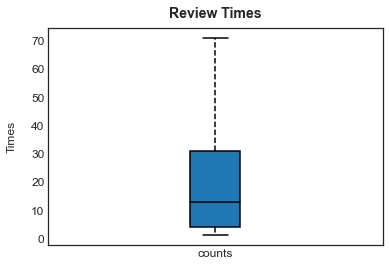

In [40]:
fig, ax=plt.subplots(figsize=(6,4))
reviews_times['counts'].plot(kind='box', ax=ax, fontsize=12,
             boxprops=dict(linestyle='-', linewidth=1.5),             
             flierprops=dict(linestyle='--', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5,color='black'),
             whiskerprops=dict(linestyle='--', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             patch_artist=True,                    
             showfliers=False,
             grid=False)
ax.set_ylabel('Times', fontsize=12, labelpad=14)
plt.title('Review Times',y=1.02, fontsize=14, fontweight='bold')
plt.show()

# Listing Dataset

## 1. Exploring the dataset

In [41]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [91]:
categoricals = listings.select_dtypes(include=['object', 'category', 'bool']).columns
print(categoricals)

['listing_url', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'requires_license', 'jurisdiction_names', 'instant_bookable', 'c

In [44]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericals=listings.select_dtypes(include=numerics).columns
print(numericals)

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')


In [45]:
#checkig the nulls 
listings_NA=listings.isna().sum().sort_values().to_frame()
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(listings_NA)

                                     0
id                                   0
price                                0
amenities                            0
bed_type                             0
accommodates                         0
room_type                            0
is_location_exact                    0
guests_included                      0
longitude                            0
country                              0
country_code                         0
smart_location                       0
market                               0
state                                0
city                                 0
calculated_host_listings_count       0
neighbourhood_group_cleansed         0
extra_people                         0
maximum_nights                       0
require_guest_phone_verification     0
require_guest_profile_picture        0
cancellation_policy                  0
instant_bookable                     0
jurisdiction_names                   0
requires_license         

 ## 2. Cleaning the dataset

In [46]:
# Screening and simplfying the features related to price
cat_cols=['id','property_type','room_type','bed_type','amenities','neighbourhood_group_cleansed','neighbourhood_cleansed','cancellation_policy',
          'instant_bookable','host_response_time']
num_cols=[ 'price', 'accommodates','security_deposit','extra_people','cleaning_fee','bedrooms','bathrooms','beds','availability_30','availability_60',
          'availability_90','availability_365','review_scores_rating','number_of_reviews']

In [47]:
# Creating a new dataframe fo analysis
df_listings=pd.concat([listings[cat_cols], listings[num_cols]], axis=1)

In [48]:
df_listings.shape

(3818, 24)

In [49]:
# Cleaning the data and changing the datatype
df_listings['id']=df_listings['id'].astype(object)
df_listings[['price','security_deposit','extra_people', 'cleaning_fee']]=df_listings[['price',
'security_deposit','extra_people', 'cleaning_fee']].replace( '[\$,)]','', regex=True ).astype(float)

In [50]:
# Handling the missing values
df_listings.isnull().sum().sort_values()

id                                 0
availability_365                   0
availability_90                    0
availability_60                    0
availability_30                    0
extra_people                       0
price                              0
instant_bookable                   0
accommodates                       0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
amenities                          0
bed_type                           0
room_type                          0
cancellation_policy                0
number_of_reviews                  0
beds                               1
property_type                      1
bedrooms                           6
bathrooms                         16
host_response_time               523
review_scores_rating             647
cleaning_fee                    1030
security_deposit                1952
dtype: int64

In [51]:
#Checking the nulls in the property_type
df_listings[df_listings['property_type'].isnull()]

,id,property_type,room_type,bed_type,amenities,neighbourhood_group_cleansed,neighbourhood_cleansed,cancellation_policy,instant_bookable,host_response_time,price,accommodates,security_deposit,extra_people,cleaning_fee,bedrooms,bathrooms,beds,availability_30,availability_60,availability_90,availability_365,review_scores_rating,number_of_reviews
2184,3335,NaN,Entire home/apt,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",Rainier Valley,Dunlap,strict,f,within a few hours,120.0,4,200.0,10.0,75.0,2.0,1.0,2.0,0,4,34,309,NaN,0


In [52]:
#Becasuse it is the entire hourse/apt with 2 bedrooms and 2 beds and 1 bathrooms, I assumes it is an apartment.
df_listings['property_type']=df_listings['property_type'].fillna('Apartment')

In [53]:
#Checking the nulls in the beds
df_listings[df_listings['beds'].isnull()]

,id,property_type,room_type,bed_type,amenities,neighbourhood_group_cleansed,neighbourhood_cleansed,cancellation_policy,instant_bookable,host_response_time,price,accommodates,security_deposit,extra_people,cleaning_fee,bedrooms,bathrooms,beds,availability_30,availability_60,availability_90,availability_365,review_scores_rating,number_of_reviews
1961,609252,House,Private room,Real Bed,{},Other neighborhoods,Greenwood,flexible,f,within an hour,280.0,4,NaN,0.0,NaN,1.0,NaN,NaN,30,60,90,365,NaN,0


In [54]:
#Because it is 1 bedroom prive room  in a hourse, I assume it has 1 bed.
df_listings['beds']=df_listings['beds'].fillna(1)

In [55]:
#Checking the nulls in the bedrooms
df_listings[df_listings['bedrooms'].isnull()]

,id,property_type,room_type,bed_type,amenities,neighbourhood_group_cleansed,neighbourhood_cleansed,cancellation_policy,instant_bookable,host_response_time,price,accommodates,security_deposit,extra_people,cleaning_fee,bedrooms,bathrooms,beds,availability_30,availability_60,availability_90,availability_365,review_scores_rating,number_of_reviews
1429,1476298,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",""Wheelchair A...",Downtown,Belltown,strict,t,within a few hours,80.0,2,NaN,25.0,30.0,NaN,1.0,1.0,25,55,58,296,94.0,170
1492,604600,Apartment,Entire home/apt,Real Bed,{},Downtown,Central Business District,strict,f,within a day,200.0,6,500.0,0.0,50.0,NaN,1.0,1.0,30,60,90,365,100.0,1
1493,1251763,Other,Entire home/apt,Real Bed,"{""Cable TV"",Internet,""Wireless Internet"",Pool,...",Downtown,Central Business District,strict,f,within a few hours,132.0,4,NaN,0.0,64.0,NaN,1.0,2.0,30,60,90,341,100.0,1
1853,17951,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",West Seattle,Fairmount Park,strict,t,within an hour,95.0,2,100.0,0.0,NaN,NaN,1.0,1.0,30,60,68,307,94.0,21
2619,948077,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",Capitol Hill,Broadway,moderate,f,within a day,99.0,2,175.0,0.0,NaN,NaN,1.0,1.0,12,29,59,329,100.0,77
2915,3272374,Apartment,Entire home/apt,Pull-out Sofa,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",Capitol Hill,Broadway,moderate,f,a few days or more,75.0,2,NaN,0.0,40.0,NaN,1.0,1.0,30,60,90,365,89.0,20


In [56]:
# For the nulls in bedrooms, I assume the number is same as the number of beds.
df_listings['bedrooms']=np.where(df_listings['bedrooms'].isnull(), df_listings['beds'], df_listings['bedrooms'])

In [58]:
#Checking the nulls in the bathrooms
df_listings[df_listings['bathrooms'].isnull()]

,id,property_type,room_type,bed_type,amenities,neighbourhood_group_cleansed,neighbourhood_cleansed,cancellation_policy,instant_bookable,host_response_time,price,accommodates,security_deposit,extra_people,cleaning_fee,bedrooms,bathrooms,beds,availability_30,availability_60,availability_90,availability_365,review_scores_rating,number_of_reviews
1242,19611,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",Downtown,Belltown,strict,f,within a few hours,107.0,4,NaN,0.0,96.0,1.0,NaN,2.0,22,46,76,151,87.0,26
1314,59827,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",Downtown,Belltown,strict,t,within a few hours,135.0,4,NaN,0.0,96.0,1.0,NaN,2.0,24,54,84,204,87.0,13
1357,19623,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",Downtown,Belltown,strict,t,within a few hours,186.0,6,NaN,0.0,107.0,2.0,NaN,3.0,25,53,83,172,89.0,38
1378,224763,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Downtown,Belltown,strict,f,within a few hours,149.0,4,100.0,0.0,88.0,1.0,NaN,1.0,0,30,60,335,93.0,27
1961,609252,House,Private room,Real Bed,{},Other neighborhoods,Greenwood,flexible,f,within an hour,280.0,4,NaN,0.0,NaN,1.0,NaN,1.0,30,60,90,365,NaN,0
1975,716829,Chalet,Private room,Real Bed,"{TV,""Free Parking on Premises"",""Pets live on t...",Other neighborhoods,Greenwood,flexible,f,within an hour,62.0,1,NaN,20.0,25.0,1.0,NaN,1.0,30,60,90,365,71.0,1
2048,354453,House,Entire home/apt,Real Bed,"{""Wireless Internet"",""Smoke Detector"",""Carbon ...",Other neighborhoods,Greenwood,strict,f,within an hour,150.0,4,NaN,50.0,50.0,2.0,NaN,4.0,30,60,90,365,NaN,0
2096,143580,House,Private room,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Free Parki...",Beacon Hill,North Beacon Hill,moderate,f,within a few hours,75.0,2,100.0,0.0,NaN,1.0,NaN,1.0,21,51,81,356,94.0,238
2306,774659,House,Entire home/apt,Real Bed,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",Rainier Valley,Mount Baker,moderate,f,within a day,105.0,3,NaN,30.0,NaN,1.0,NaN,2.0,27,27,27,240,97.0,40
2408,10385,House,Private room,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""F...",Northgate,Maple Leaf,moderate,f,within a day,60.0,2,NaN,0.0,30.0,1.0,NaN,1.0,30,60,90,365,94.0,74


In [59]:
# For the nulls in bathrooms, I assume the number is same as the number of bedrooms.
df_listings['bathrooms']=np.where(df_listings['bathrooms'].isnull(), df_listings['bedrooms'], df_listings['bathrooms'])

In [60]:
#  I fill in the medians of the review_scores_rating  and the cleaning_fee for the nulls
df_listings[['review_scores_rating','security_deposit', 'cleaning_fee']]=df_listings[['review_scores_rating', 'security_deposit','cleaning_fee']].fillna(df_listings[['review_scores_rating','security_deposit', 'cleaning_fee']].median())

In [61]:
#Checking and handling the nulls in the categorical columns and finding the most frequent item in the categorical features
most_freq=df_listings['host_response_time'].describe().loc['top']

In [62]:
#Filling in the most frequent item for the categorical nulls
df_listings['host_response_time']=df_listings['host_response_time'].fillna(most_freq)

In [63]:
#Checking the nulls in the dataframe
df_listings.isnull().sum()

id                              0
property_type                   0
room_type                       0
bed_type                        0
amenities                       0
neighbourhood_group_cleansed    0
neighbourhood_cleansed          0
cancellation_policy             0
instant_bookable                0
host_response_time              0
price                           0
accommodates                    0
security_deposit                0
extra_people                    0
cleaning_fee                    0
bedrooms                        0
bathrooms                       0
beds                            0
availability_30                 0
availability_60                 0
availability_90                 0
availability_365                0
review_scores_rating            0
number_of_reviews               0
dtype: int64

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'security_deposit'}>,
        <AxesSubplot:title={'center':'extra_people'}>],
       [<AxesSubplot:title={'center':'cleaning_fee'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'beds'}>],
       [<AxesSubplot:title={'center':'availability_30'}>,
        <AxesSubplot:title={'center':'availability_60'}>,
        <AxesSubplot:title={'center':'availability_90'}>,
        <AxesSubplot:title={'center':'availability_365'}>],
       [<AxesSubplot:title={'center':'review_scores_rating'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

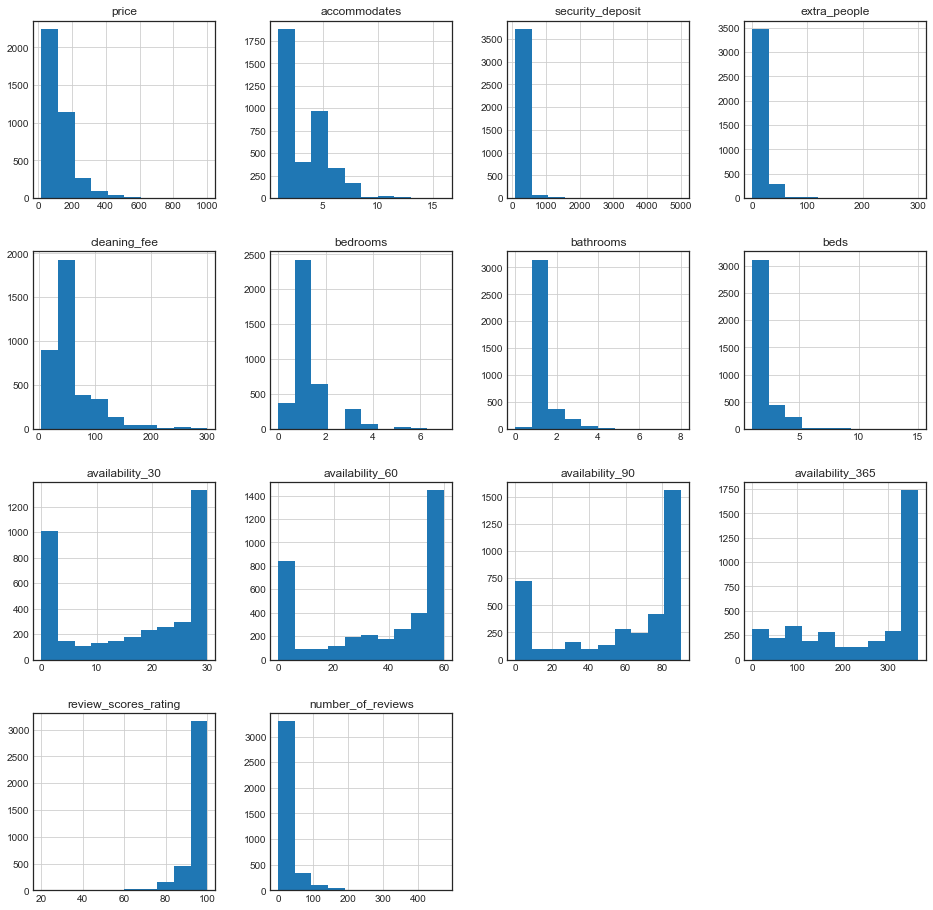

In [64]:
#Checking the outliers in numercial columns
#It seems no outliers in the dataframe numerical columns.
df_listings[num_cols].hist(figsize=(16,16))

## 3. Performing the analysis

### A. What distribution is the host cancelation policy?

In [65]:
#Checking canllenlation policy 
cancellation=df_listings[['cancellation_policy']].value_counts()

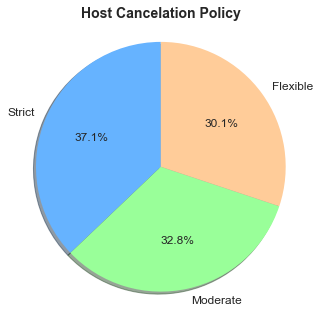

In [66]:
labels=['Strict', 'Moderate', 'Flexible']
sizes = cancellation
#[1417, 1251, 1150] 
colors = ['#66b3ff','#99ff99','#ffcc99']
fig, ax = plt.subplots(figsize=[5,5])
ax.pie(sizes, colors=colors,labels=labels, textprops={'fontsize': 12}, autopct='%1.1f%%',
        shadow=True, startangle=90,pctdistance=0.6)
ax.axis('equal')
plt.title('Host Cancelation Policy',  y=1.03, fontsize=14,fontweight='bold')

plt.show()

### B. What distribution is the host response time?

In [67]:
#Checking the reponse time
response=df_listings['host_response_time'].value_counts()
response

within an hour        2215
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

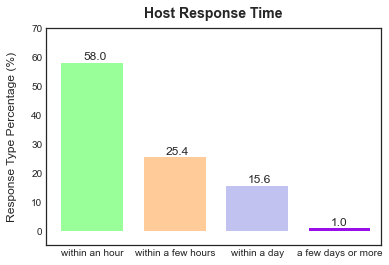

In [68]:
fig, ax = plt.subplots(figsize=(6,4))
color=['#99ff99', '#ffcc99', '#c2c2f0', '#9A0EEA']
width=0.75
ind = response.index
y=round(response/listings.shape[0]*100,1)
p1=ax.bar(ind,y, width, color = color, align='center')  
for index, value in enumerate(y):
    ax.text( index-0.11 ,value+1 , str(value), fontsize =12 )
 
ax.set_ylabel('Response Type Percentage (%)', fontsize=12, labelpad=14)
ax.set_title("Host Response Time", y=1.02, fontsize=14, fontweight='bold')
ax.set_xlim(right=3.5) 
ax.set_ylim(-5,70)

plt.show()

### C. What property type of Airbnb is popular in Seattle?

In [69]:
# Checking the property_type
property_type=df_listings['property_type'].value_counts()

Text(0.5, 1.02, 'Property Type ')

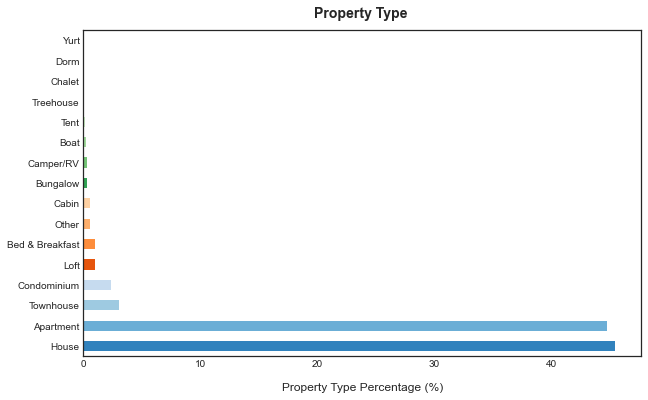

In [70]:
plt.figure(figsize=[10,6])
col_map = plt.get_cmap('tab20c')
(property_type/listings.shape[0]*100).plot(kind="barh",color=col_map.colors)
plt.xlabel('Property Type Percentage (%)', fontsize=12, labelpad=14)
plt.title("Property Type ", y=1.02, fontsize=14, fontweight='bold')

### D. Where is the popular area for Airbnb in Seattle? 

In [71]:
# Checking the neighborhood group cleansed
neigh_grp_cleansed=df_listings['neighbourhood_group_cleansed'].value_counts()

Text(0.5, 1.02, 'Neighbourhood Group Cleansed Analysis')

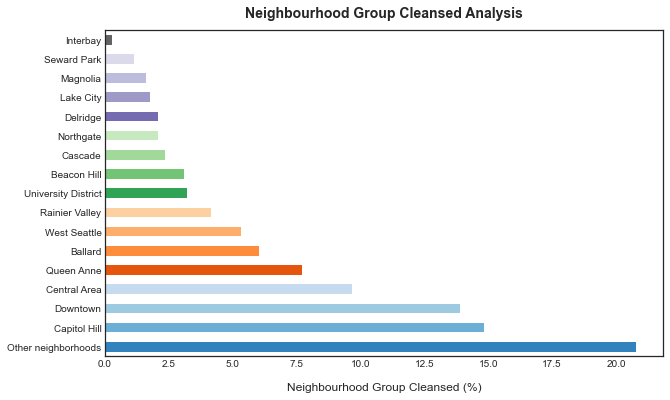

In [72]:
plt.figure(figsize=[10,6])
col_map = plt.get_cmap('tab20c')
(neigh_grp_cleansed/listings.shape[0]*100).plot(kind="barh", color=col_map.colors)
#color=plt.cm.Paired(np.arange(len(neigh_grp_cleansed)))
plt.xlabel('Neighbourhood Group Cleansed (%)', fontsize=12, labelpad=14)
plt.title("Neighbourhood Group Cleansed Analysis", y=1.02, fontsize=14, fontweight='bold')

### E. Which district should you look for Airbnb in Capitol Hill?

In [73]:
#Checking the neighbourhood in Capitol Hill
Capitol_Hill=df_listings[df_listings['neighbourhood_group_cleansed']=='Capitol Hill']

In [74]:
neigh_Capitol_Hill=Capitol_Hill.groupby(['neighbourhood_cleansed']).size().sort_values(ascending=False)

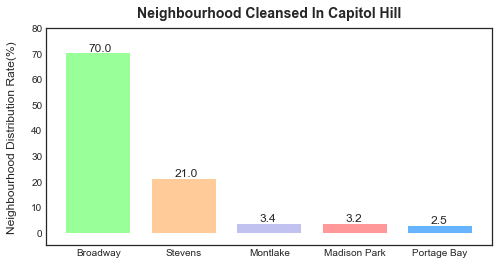

In [75]:
fig, ax = plt.subplots(figsize=(8,4))
color=['#99ff99','#ffcc99', '#c2c2f0','#ff9999','#66b3ff']
width=0.75
ind = neigh_Capitol_Hill.index
y=round(neigh_Capitol_Hill/Capitol_Hill.shape[0]*100,1)
ax.bar(ind,y, width, color = color, align='center')  
for index, value in enumerate(y):
    ax.text( index-0.11 ,value+1 , str(value), fontsize =12 )
 
ax.set_ylabel('Neighbourhood Distribution Rate(%)', fontsize=12, labelpad=14)
ax.set_title("Neighbourhood Cleansed In Capitol Hill", y=1.02, fontsize=14, fontweight='bold')
ax.set_ylim(-5,80)

plt.show()

### F. What price is Airbnb in Capitol Hill?

In [76]:
#Checking the airbnb price in Capitol Hill 
Capitol_Hill.groupby('property_type').agg({'price':['min', 'median','max']})

price              
                   min median    max
property_type                       
Apartment         22.0  105.0  600.0
Bed & Breakfast   99.0  149.0  165.0
Bungalow         140.0  140.0  140.0
Cabin             99.0  154.5  210.0
Condominium       70.0  109.5  250.0
House             27.0   99.0  750.0
Loft              81.0  115.5  150.0
Other             50.0   87.5  125.0
Townhouse         50.0  165.0  450.0
Treehouse        200.0  200.0  200.0

### G. What featues are important to predict Airbnb price?

Text(0.5, 1.02, 'Correlations of Numerical Features')

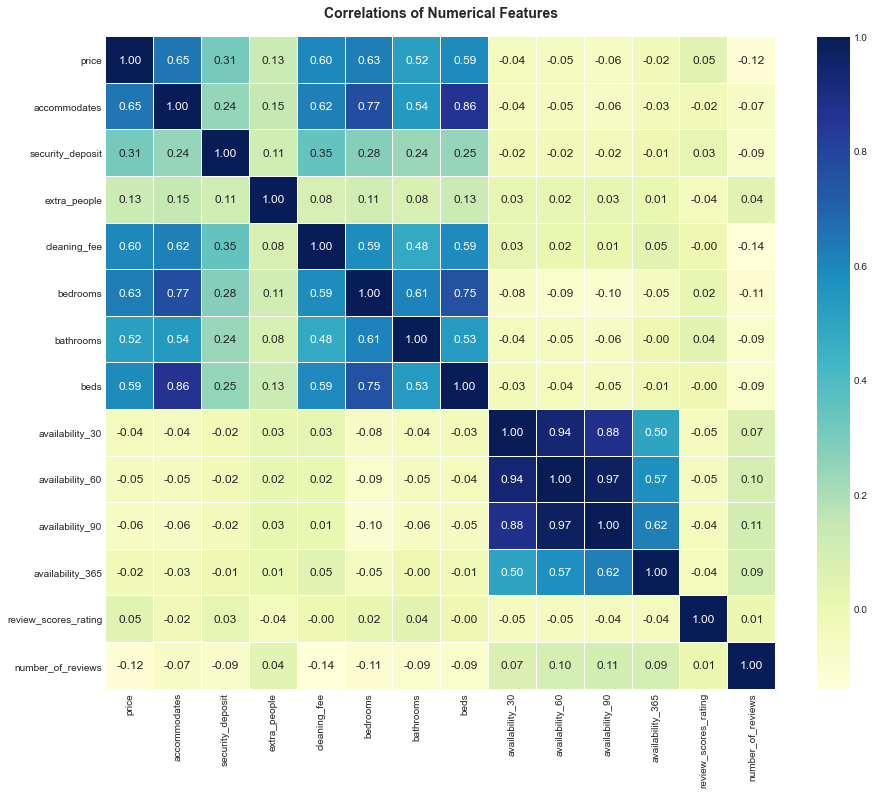

In [77]:
#checking the correlations between numercial features
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(df_listings.corr(), annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.1, annot_kws={"size":12})
sns.set(font_scale=1.3)
plt.title('Correlations of Numerical Features',y=1.02, fontsize=14, fontweight='bold')

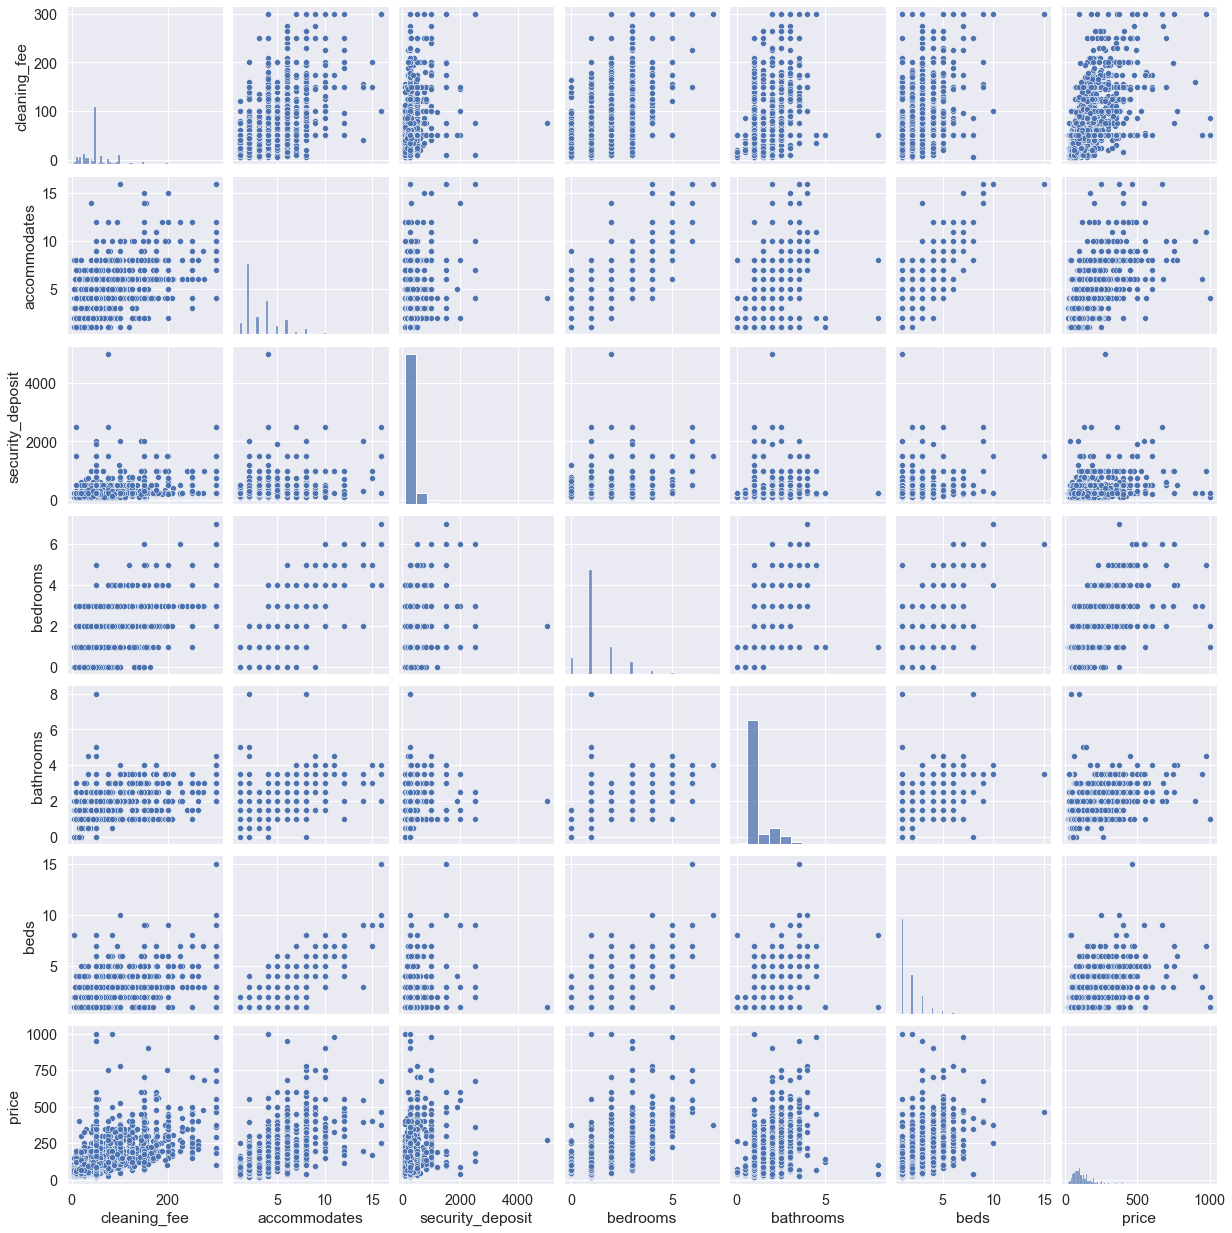

In [78]:
#Checking the features with high correlations
sns.pairplot(data=df_listings[['cleaning_fee','accommodates','security_deposit', 'bedrooms', 'bathrooms', 'beds', 'price']])
sns.set(font_scale=1.2)

In [79]:
#Getting a new file
df1_listings=df_listings.copy()

## 4. Machine Learning

### 1) Get the data and generate a new dataframe 


In [80]:
# drop unwated features
df1_listings=df1_listings.drop(['id','property_type', 'bed_type','amenities', 'neighbourhood_cleansed'], axis=1)
df1_listings.head()

,room_type,neighbourhood_group_cleansed,cancellation_policy,instant_bookable,host_response_time,price,accommodates,security_deposit,extra_people,cleaning_fee,bedrooms,bathrooms,beds,availability_30,availability_60,availability_90,availability_365,review_scores_rating,number_of_reviews
0,Entire home/apt,Queen Anne,moderate,f,within a few hours,85.0,4,250.0,5.0,50.0,1.0,1.0,1.0,14,41,71,346,95.0,207
1,Entire home/apt,Queen Anne,strict,f,within an hour,150.0,4,100.0,0.0,40.0,1.0,1.0,1.0,13,13,16,291,96.0,43
2,Entire home/apt,Queen Anne,strict,f,within a few hours,975.0,11,1000.0,25.0,300.0,5.0,4.5,7.0,1,6,17,220,97.0,20
3,Entire home/apt,Queen Anne,flexible,f,within an hour,100.0,3,250.0,0.0,50.0,0.0,1.0,2.0,0,0,0,143,96.0,0
4,Entire home/apt,Queen Anne,strict,f,within an hour,450.0,6,700.0,15.0,125.0,3.0,2.0,3.0,30,60,90,365,92.0,38


In [81]:
#Transform Feature
df1_listings['room_type'] = df1_listings['room_type'].map({'Entire home/apt':2, 'Private room':1,'Shared room':0})
df1_listings['cancellation_policy']=df1_listings['cancellation_policy'].map({'strict':0, 'moderate':1, 'flexible':2})
df1_listings['instant_bookable']=df1_listings['instant_bookable'].map({'f':0, 't':1})
df1_listings['host_response_time']=df1_listings['host_response_time'].map({'within an hour':3, 'within a few hours':2, 
                                                                           'within a day':1, 'a few days or more':0})
df1_listings['neighbourhood_group_cleansed']=df1_listings['neighbourhood_group_cleansed'].map({'Other neighborhoods':0, 
'Interbay':1,'Seward Park':2, 'Magnolia':3, 'Lake City':4, 'Delridge':5, "Northgate":6, 'Cascade':7, 'Beacon Hill':8,
'University District':9, 'Rainier Valley':10, 'West Seattle':11, 'Ballard':12, 'Queen Anne':13, 'Central Area':14, 
                'Downtown':15, 'Capitol Hill':16})
df1_listings.head()

,room_type,neighbourhood_group_cleansed,cancellation_policy,instant_bookable,host_response_time,price,accommodates,security_deposit,extra_people,cleaning_fee,bedrooms,bathrooms,beds,availability_30,availability_60,availability_90,availability_365,review_scores_rating,number_of_reviews
0,2,13,1,0,2,85.0,4,250.0,5.0,50.0,1.0,1.0,1.0,14,41,71,346,95.0,207
1,2,13,0,0,3,150.0,4,100.0,0.0,40.0,1.0,1.0,1.0,13,13,16,291,96.0,43
2,2,13,0,0,2,975.0,11,1000.0,25.0,300.0,5.0,4.5,7.0,1,6,17,220,97.0,20
3,2,13,2,0,3,100.0,3,250.0,0.0,50.0,0.0,1.0,2.0,0,0,0,143,96.0,0
4,2,13,0,0,3,450.0,6,700.0,15.0,125.0,3.0,2.0,3.0,30,60,90,365,92.0,38


In [82]:
#Geting the wanted features basing on the correlation map and avove analysis
cols=['room_type','bedrooms','bathrooms', 'accommodates','cleaning_fee','security_deposit','neighbourhood_group_cleansed',
     'price']

In [83]:
new_listings=df1_listings[cols]
new_listings.head()

,room_type,bedrooms,bathrooms,accommodates,cleaning_fee,security_deposit,neighbourhood_group_cleansed,price
0,2,1.0,1.0,4,50.0,250.0,13,85.0
1,2,1.0,1.0,4,40.0,100.0,13,150.0
2,2,5.0,4.5,11,300.0,1000.0,13,975.0
3,2,0.0,1.0,3,50.0,250.0,13,100.0
4,2,3.0,2.0,6,125.0,700.0,13,450.0


Text(0.5, 1.02, 'Correlations of Price Related Features')

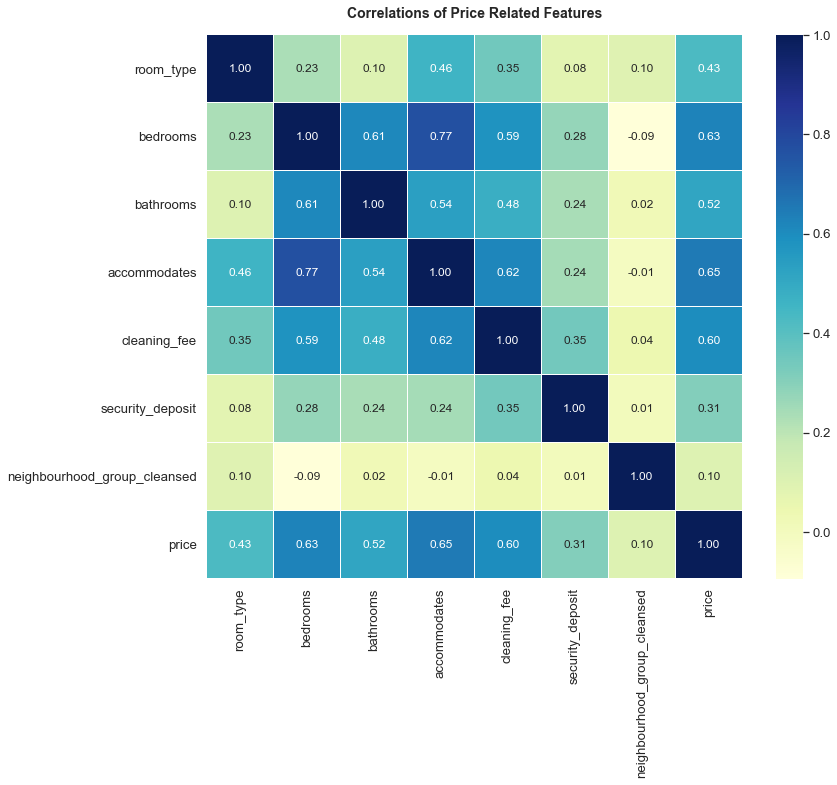

In [84]:
#Checking the correlatons in the new dataframe
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(new_listings.corr(),annot=True, fmt='.2f', cmap="YlGnBu", linewidths=0.1, annot_kws={"size":12})
sns.set(font_scale=1.2)
plt.title('Correlations of Price Related Features',y=1.02, fontsize=14, fontweight='bold')

### 2) Separate the data into X (features) and y (target)

In [85]:
X= new_listings.iloc[:,:-1].values

In [86]:
y = new_listings.iloc[:,-1].values

### 3) Split the data into train and test sets

In [87]:
# split dataset into test/train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [88]:
X_train.shape, X_test.shape

((2672, 7), (1146, 7))

## 5.  Multiple Linear Regression

### H. How to predict Airbnb price?

In [89]:
# with sklearn
regr = LinearRegression(normalize=True)
regr.fit(X_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X_train = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -60.37039677549528
Coefficients: 
 [32.64727976 22.32477422 24.40941555  7.71813345  0.43646423  0.03777954
  1.422107  ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     486.1
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:13:21   Log-Likelihood:                -14692.
No. Observations:                2672   AIC:                         2.940e+04
Df Residuals:                    2664   BIC:                         2.945e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9